# Introduction to Image Processing

Mojdeh Rastgoo - Guillaume Lemaitre - Desire Sidibe

## **Spatial Filtering and de-noising**

The modules which are commonly used are entered in the following cell.

In [1]:
%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io 
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import color 

from skimage.filters.rank import mean
# import the function to add some noise
from skimage.util import random_noise
from skimage.morphology import disk


In [46]:
Path = './images/'
lena_im = io.imread(Path.__add__('lena-grey.bmp'))
lena_im = img_as_float(lena_im)

Path = './images/'
leaves= io.imread(Path.__add__('leaves.jpg'))
leaves = img_as_float(leaves)

from skimage import color

leaves = color.rgb2gray(leaves);

Path = './images/'
railway= io.imread(Path.__add__('railway.jpg'))
railway = img_as_float(railway)

railway = color.rgb2gray(railway);


Path = './images/'
buliding= io.imread(Path.__add__('railway.jpg'))
building = img_as_float(building)

building = color.rgb2gray(railway);

Path = './images/'
sudoku= io.imread(Path.__add__('sudoku.jpg'))
sudoku = img_as_float(sudoku)

sudoku = color.rgb2gray(sudoku);

## Smoothing

### Mean filter 
Smooth the lena image, by mean filter, using different disk circles with radius of $ r = 1, 3, 5, 7$

Use [`skimage.filter.rank.mean`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) and [`skimage.morphology.disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function 

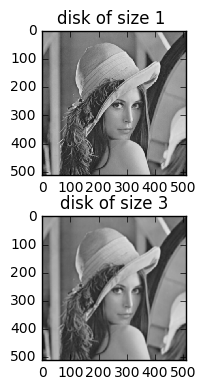

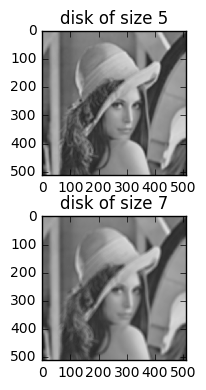

In [11]:
     #apply different size of mean disk to the image
    
avg5 = mean(lena_im, disk(5))

avg1 = mean(lena_im, disk(1)) 

avg3 = mean(lena_im, disk(3)) 

avg7 = mean(lena_im, disk(7))


plt.figure()
plt.subplot(2,1,1)
io.imshow(avg1)
plt.title('disk of size 1 ')
plt.subplot(2,1,2)
io.imshow(avg3)
plt.title('disk of size 3')


plt.figure()
plt.subplot(2,1,1)
io.imshow(avg5)
plt.title('disk of size 5')
plt.subplot(2,1,2)
io.imshow(avg7)
plt.title('disk of size 7')

### Filtering using convolution 
Once again apply the mean fiter, howver instead of using `filter.rank` make your mean mask having the same size as the last filter you applied and use convolution to apply the filter. 

The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

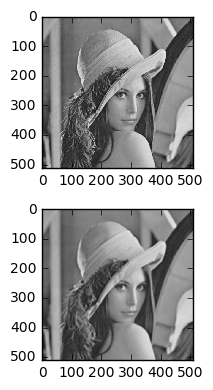

In [6]:
#create a averaging mask of size 5 where the sum of all the term is equal to 1
a=1/25
mask=[[ a,  a,  a,  a,  a],
       [ a,  a,  a,  a,  a],
       [ a,  a,  a,  a,  a],
       [ a,  a,  a,  a,  a],
       [ a,  a,  a,  a,  a]]

from scipy import signal

#convolve the mask and the image
conv=signal.convolve2d(lena_im,mask, boundary='symm', mode='same')


plt.figure()
plt.subplot(2,1,1)
io.imshow(lena_im)
plt.title('original')
plt.subplot(2,1,2)
io.imshow(conv)
plt.title('convolved with the mask')

Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

### Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters were already implemented in `skimage` and can be directly used without applying the previous processing.

The modules `filters` and `filters.rank` implement well known filters.

In [3]:
from skimage import filters

#####  First-order edge detector

You already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator as an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

**Apply these different filters on Leaves image (`leaves.jpg`).**

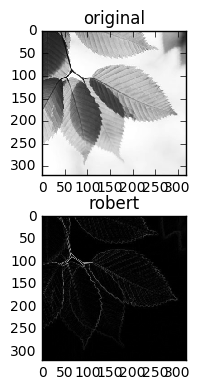

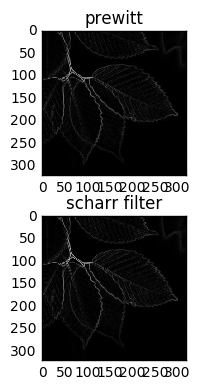

In [7]:
#apply the roberts,sobels and prewitt filters to the image
robert=filters.roberts(leaves)
prewitt=filters.prewitt(leaves)
scharr=filters.scharr(leaves)


plt.figure()
plt.subplot(2,1,1)
io.imshow(leaves)
plt.title('original')
plt.subplot(2,1,2)
io.imshow(robert)
plt.title('robert')
plt.figure()
plt.subplot(2,1,1)
io.imshow(prewitt)
plt.title('prewitt')
plt.subplot(2,1,2)
io.imshow(scharr)
plt.title('scharr filter')

#the scarr filter give the best line detection

##### Second-order edge detector

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does not provide any implementation of this filter (yet). The `scipy` toolbox, however, does through the function `ndimage.filters.laplace`.

**Apply this filter on the Leaves image.**

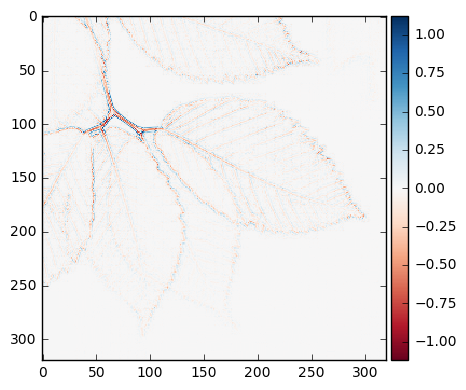

In [50]:

laplace=filters.laplace(leaves)

io.imshow(laplace)

## Denoising filters

Different filters can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function `util.random_noise`.

**Generate corrupted some Lena images with gaussian noise, salt & peppers noise, and speckle noise. Keep the default parameters.**

In [9]:
from skimage import util

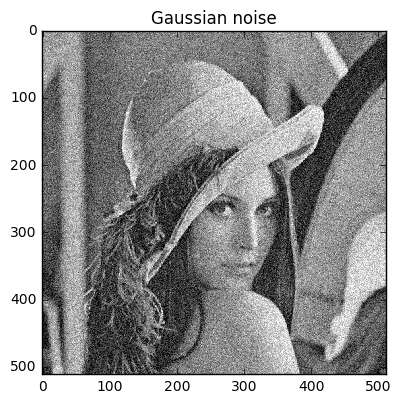

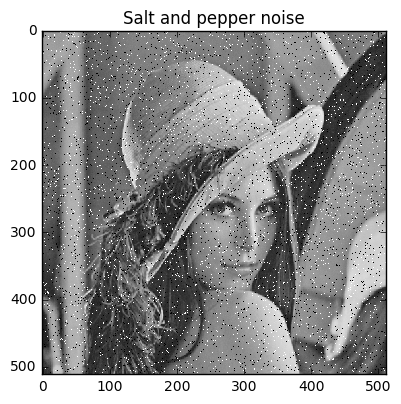

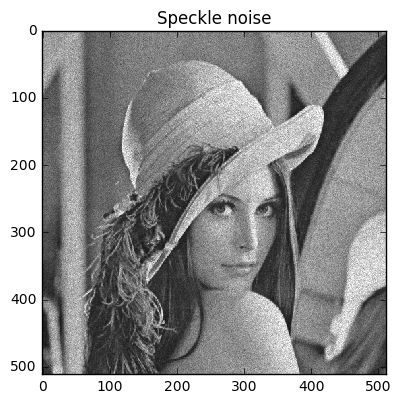

In [10]:

# Corrupt Lena
lena_gaussian = util.random_noise(lena_im, mode='gaussian')
lena_sp = util.random_noise(lena_im, mode='s&p')
lena_speckle = util.random_noise(lena_im, mode='speckle')

# Show the different corrupted Lena
plt.figure()
io.imshow(lena_gaussian)
plt.title('Gaussian noise')          
plt.figure()
io.imshow(lena_sp)
plt.title('Salt and pepper noise')
plt.figure()
io.imshow(lena_speckle)
plt.title('Speckle noise')

**Apply `median`, `mean` and `alpha-trimmed` mean filter on different corrupted Lena images with the mask corresponding to disk 1 and 3.**

 `alpha-trimmed` ([`mean_percentile`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean_percentile)) mean filter works similar to normal mean filter. However, it considers only the grey values inside a specific range.

** mean filter: ** 

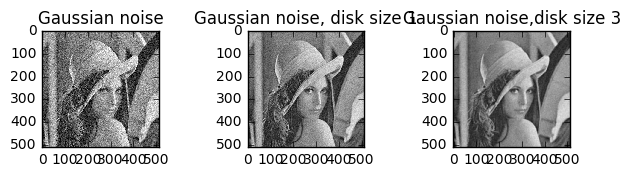

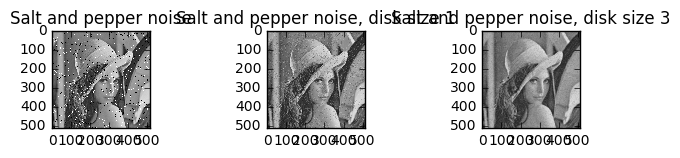

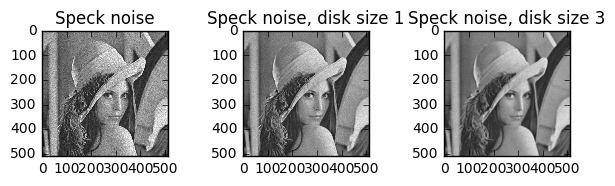

In [12]:
#apply averaging disk to the different noised image
avg3gauss = mean(lena_gaussian, disk(3))
avg1gauss = mean(lena_gaussian, disk(1))

avg3salt = mean(lena_sp, disk(3))
avg1salt = mean(lena_sp, disk(1))

avg3speck = mean(lena_speckle, disk(3))
avg1speck = mean(lena_speckle, disk(1))


plt.figure()
plt.subplot(1,3,1)
io.imshow(lena_gaussian)
plt.title('Gaussian noise')    
plt.subplot(1,3,2)
io.imshow(avg1gauss)
plt.title('Gaussian noise, disk size 1')    
plt.subplot(1,3,3)
io.imshow(avg3gauss)
plt.title('Gaussian noise,disk size 3')    


plt.figure()
plt.subplot(1,3,1)
io.imshow(lena_sp)
plt.title('Salt and pepper noise')    
plt.subplot(1,3,2)
io.imshow(avg1salt)
plt.title('Salt and pepper noise, disk size 1')    
plt.subplot(1,3,3)
io.imshow(avg3salt)
plt.title('Salt and pepper noise, disk size 3')    


plt.figure()
plt.subplot(1,3,1)
io.imshow(lena_speckle)
plt.title('Speck noise')  
plt.subplot(1,3,2)
io.imshow(avg1speck)
plt.title('Speck noise, disk size 1')  
plt.subplot(1,3,3)
io.imshow(avg3speck)
plt.title('Speck noise, disk size 3') 

#We can remark than applying an averaging disk work pretty well especially on speckle noise. However a deal 
#between noise and bluredness must be found

** alpha-trimmed mean filter: **

Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95].

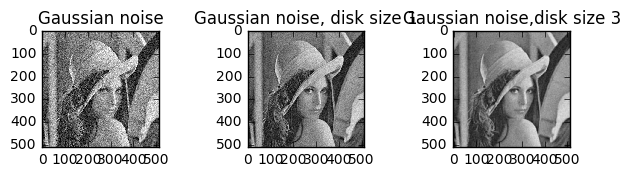

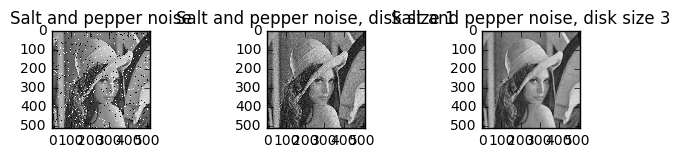

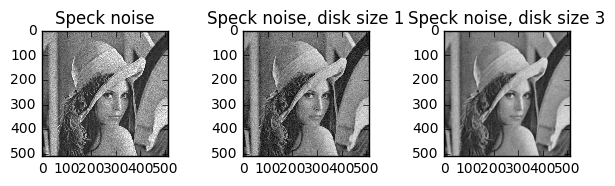

In [14]:
trim=filters.rank.mean_percentile(lena_gaussian,disk(1),p0=0.05,p1=0.95)

#apply averaging disk to the different noised image
avg3gauss = filters.rank.mean_percentile(lena_gaussian,disk(3),p0=0.05,p1=0.95)
avg1gauss = filters.rank.mean_percentile(lena_gaussian,disk(1),p0=0.05,p1=0.95)

avg3salt = filters.rank.mean_percentile(lena_gaussian,disk(3),p0=0.05,p1=0.95)
avg1salt = filters.rank.mean_percentile(lena_gaussian,disk(1),p0=0.05,p1=0.95)

avg3speck = filters.rank.mean_percentile(lena_gaussian,disk(3),p0=0.05,p1=0.95)
avg1speck = filters.rank.mean_percentile(lena_gaussian,disk(1),p0=0.05,p1=0.95)


plt.figure()
plt.subplot(1,3,1)
io.imshow(lena_gaussian)
plt.title('Gaussian noise')    
plt.subplot(1,3,2)
io.imshow(avg1gauss)
plt.title('Gaussian noise, disk size 1')    
plt.subplot(1,3,3)
io.imshow(avg3gauss)
plt.title('Gaussian noise,disk size 3')    


plt.figure()
plt.subplot(1,3,1)
io.imshow(lena_sp)
plt.title('Salt and pepper noise')    
plt.subplot(1,3,2)
io.imshow(avg1salt)
plt.title('Salt and pepper noise, disk size 1')    
plt.subplot(1,3,3)
io.imshow(avg3salt)
plt.title('Salt and pepper noise, disk size 3')    


plt.figure()
plt.subplot(1,3,1)
io.imshow(lena_speckle)
plt.title('Speck noise')  
plt.subplot(1,3,2)
io.imshow(avg1speck)
plt.title('Speck noise, disk size 1')  
plt.subplot(1,3,3)
io.imshow(avg3speck)
plt.title('Speck noise, disk size 3') 

#By getting ride of extremes values this technique allow a better result on Salt and peper image.
#However it give pretty similar results to simple disk for the others type of noise

** median filter: **

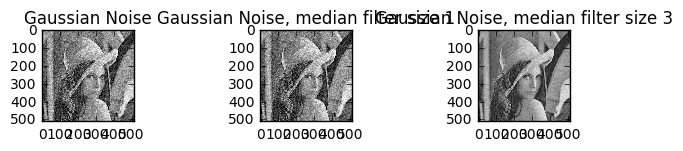

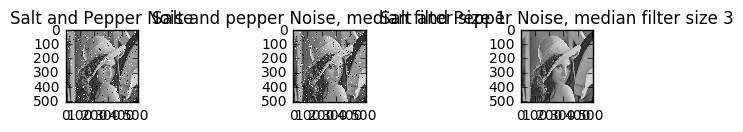

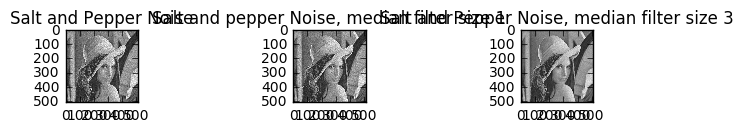

In [18]:

from scipy import ndimage

plt.figure()
plt.subplot(1,3,1)
io.imshow(lena_gaussian)
plt.title('Gaussian Noise')
plt.subplot(1,3,2)
io.imshow(ndimage.median_filter(lena_gaussian, 1))
plt.title('Gaussian Noise, median filter size 1')
plt.subplot(1,3,3)
io.imshow(ndimage.median_filter(lena_gaussian, 3))
plt.title('Gaussian Noise, median filter size 3')


plt.figure()
plt.subplot(1,3,1)
io.imshow(lena_sp)
plt.title('Salt and Pepper Noise')
plt.subplot(1,3,2)
io.imshow(ndimage.median_filter(lena_sp, 1))
plt.title('Salt and pepper Noise, median filter size 1')
plt.subplot(1,3,3)
io.imshow(ndimage.median_filter(lena_sp, 3))
plt.title('Salt and Pepper Noise, median filter size 3')


plt.figure()
plt.subplot(1,3,1)
io.imshow(lena_speckle)
plt.title('Salt and Pepper Noise')
plt.subplot(1,3,2)
io.imshow(ndimage.median_filter(lena_speckle, 1))
plt.title('Salt and pepper Noise, median filter size 1')
plt.subplot(1,3,3)
io.imshow(ndimage.median_filter(lena_speckle, 3))
plt.title('Salt and Pepper Noise, median filter size 3')

#We can remark than the median filter give better result on the speckle and the Salt and pepper noised picture
#than a simple averaging disk

## Sharpening

Use the `railway` image and sharpen the image using laplacian fitering.

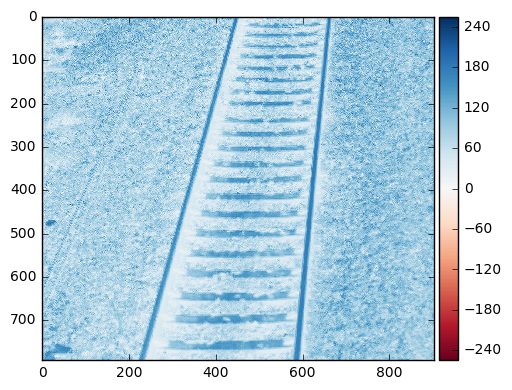

In [7]:

laplace=filters.laplace(railway)
sharpened = railway- laplace
sharpened=sharpened * (255.0/np.max(sharpened ))
io.imshow(sharpened)

## Hough transform

** Define your Hough_trans function which finds the lines within an image** 

you can use either `hough_line` and `hough_line_peaks` or `probabilistic_hough_line` from [`skimage.transform`](http://scikit-image.org/docs/dev/api/skimage.transform.html). 

search a bit to know the difference between `probablistic_hough_line` and `hough_line`

Or `HoughLines` and `HoughLinesP` from [`cv2`](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)


Test your function on `railway` and `building` images. 

**Note : use `skimage.feature.canny` (`cv2.canny`) edge detector to find the primary edges**

In [51]:

def HoughLineDetection(im_path,threshold,Linelengh):
 
    #from http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html
     
    import cv2
    import numpy as np

    img = cv2.imread(im_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #pass the image in black and white
    edges = cv2.Canny(gray,50,150,apertureSize = 3) #Use a canny filter to obtain a binary image

    lines = cv2.HoughLines(edges,threshold,np.pi/180,Linelengh) #extract the Line by using the Hough domain
    for rho,theta in lines[0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),1) #draw a blue line from x1,y1 to x2,y2 with a width of 1 
    
    return img;
    
    
def ProbHough(im_path,threshold,minLineLength,maxLineGap):
    
    #from http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html
    
    import cv2
    import numpy as np

    img = cv2.imread(im_path) #load the image

    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #pass it into the grey domain
    edges = cv2.Canny(gray,50,150,apertureSize = 3) #does a canny filter to extract the edge and obatin a Binary image
    lines = cv2.HoughLinesP(edges,threshold,np.pi/180,100,minLineLength,maxLineGap) #apply the Probabilist Hough Transform
    for x1,y1,x2,y2 in lines[0]:#Draw the lines
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
    return img    

TypeError: 'NoneType' object has no attribute '__getitem__'

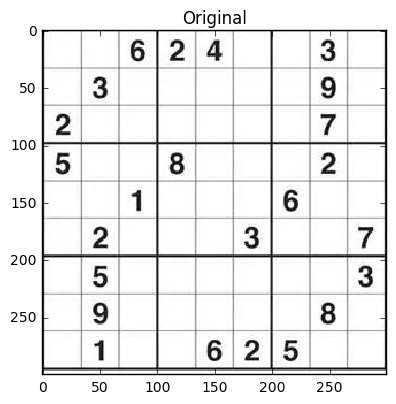

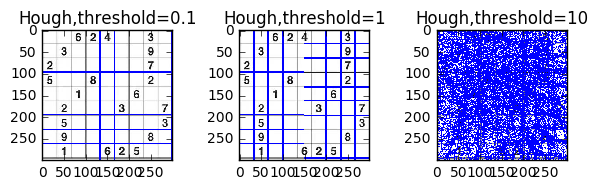

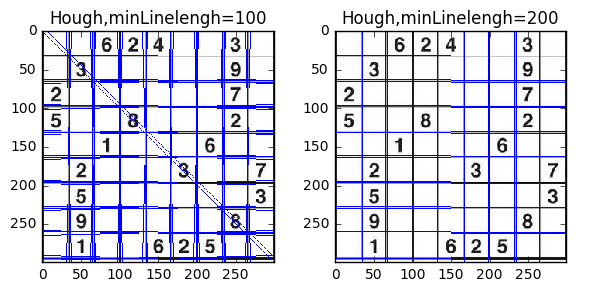

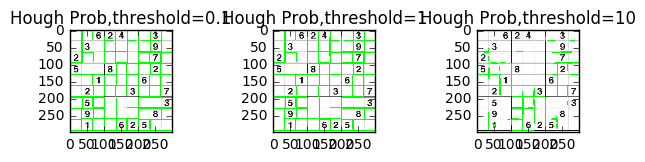

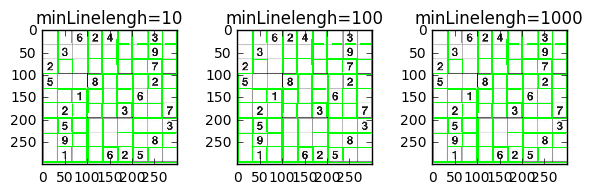

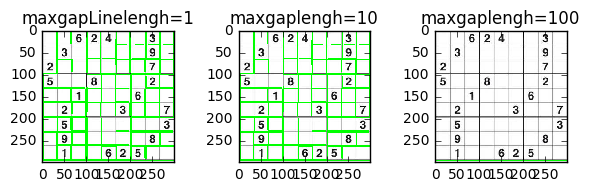

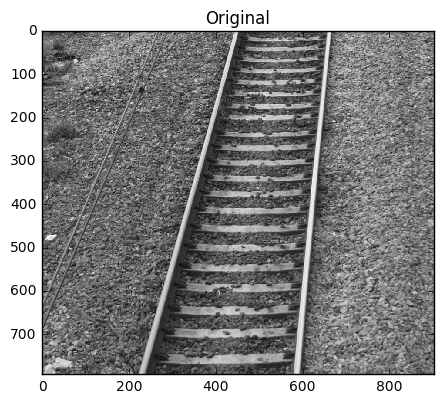

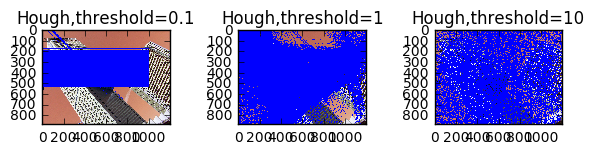

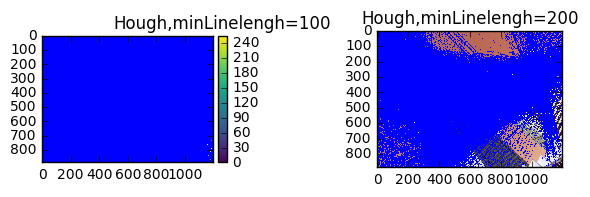

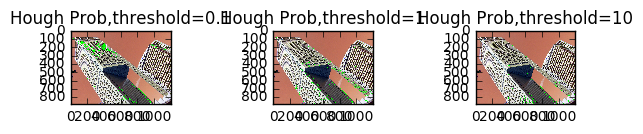

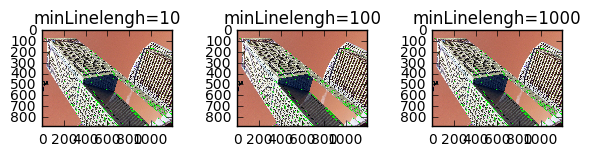

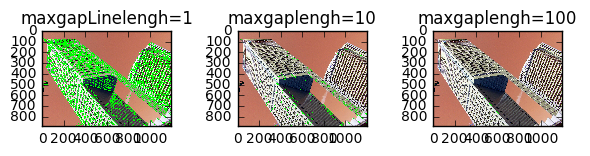

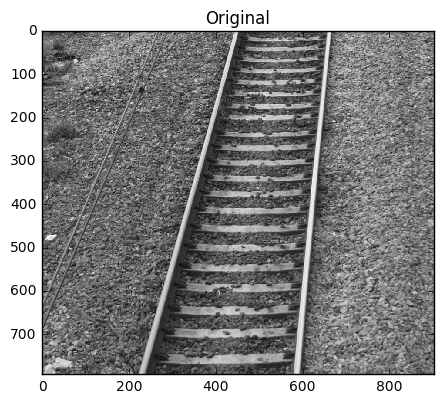

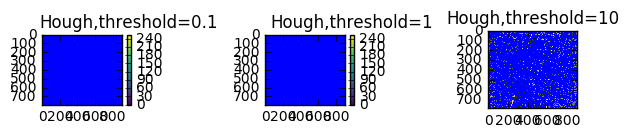

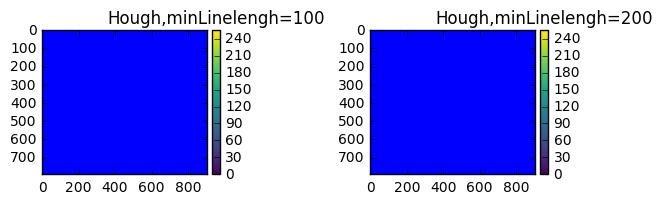

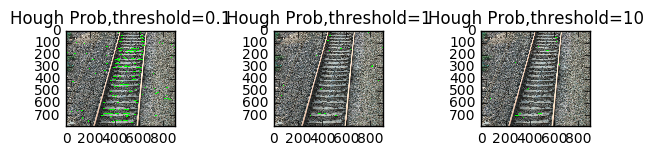

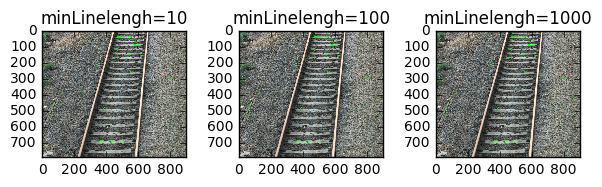

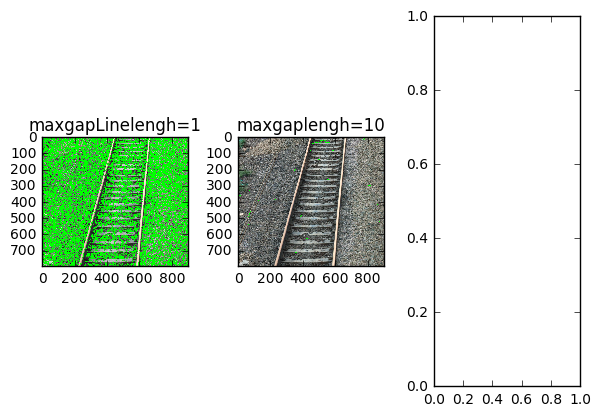

In [54]:
sudoku_path='./images/sudoku.jpg' 
building_path='./images/building.jpg' 
railway_path='./images/railway.jpg' 

#The difference between the Hough Line Transform and the Probabilistic Hough Line Transform is that, when the Line 
#transform link all the point in the Hough domain the probabilistic one will link only some randomly chosen points
#We can remark than, while being faster, the probabilistic Hough line transform is also less noise sensitive (compare sudoku/railway)
#We can also remark than the Hough Transform and the Hough probabilistic line transform both rely greatly on their
#parameters and that those must be tuned carefully. This imply that each problem/kind of image will need to retune the parameters



plt.figure()
io.imshow(sudoku)
plt.title('Original')

plt.figure()
plt.subplot(1,3,1)
io.imshow(HoughLineDetection(sudoku_path,0.1,200))
plt.title('Hough,threshold=0.1')
plt.subplot(1,3,2)
io.imshow(HoughLineDetection(sudoku_path,1,200))
plt.title('Hough,threshold=1')
plt.subplot(1,3,3)
io.imshow(HoughLineDetection(sudoku_path,10,200))
plt.title('Hough,threshold=10')


plt.figure()
plt.subplot(1,2,1)
io.imshow(HoughLineDetection(sudoku_path,1,100))
plt.title('Hough,minLinelengh=100')
plt.subplot(1,2,2)
io.imshow(HoughLineDetection(sudoku_path,1,200))
plt.title('Hough,minLinelengh=200')

plt.figure()
plt.subplot(1,3,1)
io.imshow(ProbHough(sudoku_path,0.1,100,10))
plt.title('Hough Prob,threshold=0.1')
plt.subplot(1,3,2)
io.imshow(ProbHough(sudoku_path,1,100,10))
plt.title('Hough Prob,threshold=1')
plt.subplot(1,3,3)
io.imshow(ProbHough(sudoku_path,10,100,10))
plt.title('Hough Prob,threshold=10')


plt.figure()
plt.subplot(1,3,1)
io.imshow(ProbHough(sudoku_path,1,10,10))
plt.title('minLinelengh=10')
plt.subplot(1,3,2)
io.imshow(ProbHough(sudoku_path,1,100,10))
plt.title('minLinelengh=100')
plt.subplot(1,3,3)
io.imshow(ProbHough(sudoku_path,1,1000,10))
plt.title('minLinelengh=1000')


plt.figure()
plt.subplot(1,3,1)
io.imshow(ProbHough(sudoku_path,1,100,1))
plt.title('maxgapLinelengh=1')
plt.subplot(1,3,2)
io.imshow(ProbHough(sudoku_path,1,100,10))
plt.title('maxgaplengh=10')
plt.subplot(1,3,3)
io.imshow(ProbHough(sudoku_path,1,100,100))
plt.title('maxgaplengh=100')

plt.figure()
io.imshow(building)
plt.title('Original')

plt.figure()
plt.subplot(1,3,1)
io.imshow(HoughLineDetection(building_path,0.1,200))
plt.title('Hough,threshold=0.1')
plt.subplot(1,3,2)
io.imshow(HoughLineDetection(building_path,1,200))
plt.title('Hough,threshold=1')
plt.subplot(1,3,3)
io.imshow(HoughLineDetection(building_path,10,200))
plt.title('Hough,threshold=10')


plt.figure()
plt.subplot(1,2,1)
io.imshow(HoughLineDetection(building_path,1,100))
plt.title('Hough,minLinelengh=100')
plt.subplot(1,2,2)
io.imshow(HoughLineDetection(building_path,1,200))
plt.title('Hough,minLinelengh=200')

plt.figure()
plt.subplot(1,3,1)
io.imshow(ProbHough(building_path,0.1,100,10))
plt.title('Hough Prob,threshold=0.1')
plt.subplot(1,3,2)
io.imshow(ProbHough(building_path,1,100,10))
plt.title('Hough Prob,threshold=1')
plt.subplot(1,3,3)
io.imshow(ProbHough(building_path,10,100,10))
plt.title('Hough Prob,threshold=10')


plt.figure()
plt.subplot(1,3,1)
io.imshow(ProbHough(building_path,1,10,10))
plt.title('minLinelengh=10')
plt.subplot(1,3,2)
io.imshow(ProbHough(building_path,1,100,10))
plt.title('minLinelengh=100')
plt.subplot(1,3,3)
io.imshow(ProbHough(building_path,1,1000,10))
plt.title('minLinelengh=1000')


plt.figure()
plt.subplot(1,3,1)
io.imshow(ProbHough(building_path,1,100,1))
plt.title('maxgapLinelengh=1')
plt.subplot(1,3,2)
io.imshow(ProbHough(building_path,1,100,10))
plt.title('maxgaplengh=10')
plt.subplot(1,3,3)
io.imshow(ProbHough(building_path,1,100,100))
plt.title('maxgaplengh=100')

plt.figure()
io.imshow(railway)
plt.title('Original')

plt.figure()
plt.subplot(1,3,1)
io.imshow(HoughLineDetection(railway_path,0.1,200))
plt.title('Hough,threshold=0.1')
plt.subplot(1,3,2)
io.imshow(HoughLineDetection(railway_path,1,200))
plt.title('Hough,threshold=1')
plt.subplot(1,3,3)
io.imshow(HoughLineDetection(railway_path,10,200))
plt.title('Hough,threshold=10')


plt.figure()
plt.subplot(1,2,1)
io.imshow(HoughLineDetection(railway_path,1,100))
plt.title('Hough,minLinelengh=100')
plt.subplot(1,2,2)
io.imshow(HoughLineDetection(railway_path,1,200))
plt.title('Hough,minLinelengh=200')


plt.figure()
plt.subplot(1,3,1)
io.imshow(ProbHough(railway_path,0.1,100,10))
plt.title('Hough Prob,threshold=0.1')
plt.subplot(1,3,2)
io.imshow(ProbHough(railway_path,1,100,10))
plt.title('Hough Prob,threshold=1')
plt.subplot(1,3,3)
io.imshow(ProbHough(railway_path,10,100,10))
plt.title('Hough Prob,threshold=10')


plt.figure()
plt.subplot(1,3,1)
io.imshow(ProbHough(railway_path,1,10,10))
plt.title('minLinelengh=10')
plt.subplot(1,3,2)
io.imshow(ProbHough(railway_path,1,100,10))
plt.title('minLinelengh=100')
plt.subplot(1,3,3)
io.imshow(ProbHough(railway_path,1,1000,10))
plt.title('minLinelengh=1000')


plt.figure()
plt.subplot(1,3,1)
io.imshow(ProbHough(railway_path,1,100,1))
plt.title('maxgapLinelengh=1')
plt.subplot(1,3,2)
io.imshow(ProbHough(railway_path,1,100,10))
plt.title('maxgaplengh=10')
plt.subplot(1,3,3)
io.imshow(ProbHough(railway_path,1,100,100)) #give an error as there is no line found
plt.title('maxgaplengh=100')
